In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#verilerin yüklenmesi
veriler=pd.read_csv("/content/my_iris.csv")
veriler

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
#KORELASYON İLİŞKİLERİ
corr_matrix = veriler.corr()
def en_yuksek_iliskiler(corr_matrix):
    # Korelasyon matrisini sütunlara göre sıralama
    sorted_corr = corr_matrix.unstack().sort_values(ascending=False)

    # Sıralanmış korelasyon değerlerinin en yüksek olduğu sütun ikililerini yazdırma
    for i, (s1, s2) in enumerate(sorted_corr.index):
        if s1 != s2:  # Aynı sütun ikilisini tekrarlamamak için
            print(f"{s1}-{s2}: {sorted_corr[i]}")

# Örnek kullanım
en_yuksek_iliskiler(corr_matrix)

petal_length-petal_width: 0.9627570970509662
petal_width-petal_length: 0.9627570970509662
sepal_length-petal_length: 0.8717541573048716
petal_length-sepal_length: 0.8717541573048716
sepal_length-petal_width: 0.8179536333691642
petal_width-sepal_length: 0.8179536333691642
sepal_length-sepal_width: -0.10936924995064931
sepal_width-sepal_length: -0.10936924995064931
sepal_width-petal_width: -0.35654408961380507
petal_width-sepal_width: -0.35654408961380507
sepal_width-petal_length: -0.4205160964011539
petal_length-sepal_width: -0.4205160964011539


<ipython-input-3-b4fccfc7c866>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = veriler.corr()


In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def one_hot_encode(data, columns):
    # Kategorik sütunları seçme
    categorical_data = data[columns]

    # One-Hot Encoder oluşturma
    encoder = OneHotEncoder(sparse=False, drop='first')

    # Kategorik veriyi dönüştürme
    encoded_data = encoder.fit_transform(categorical_data)

    # One-Hot Encoding sonucunu DataFrame'e dönüştürme
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))

    # Dönüştürülmüş veriyi orijinal veriyle birleştirme
    preprocessed_data = pd.concat([data.drop(columns, axis=1), encoded_df], axis=1)

    return preprocessed_data




def min_max_scale(data, column):
    # Min-Max Scaler oluşturma
    scaler = MinMaxScaler()

    # Sütunu seçme ve ölçeklendirme
    scaled_column = scaler.fit_transform(data[[column]])

    # Ölçeklendirilmiş sütunu yeni bir DataFrame'e dönüştürme
    scaled_data = pd.DataFrame(scaled_column, columns=[column])

    # Ölçeklendirilmiş sütunu orijinal veri setine ekleme
    data[column] = scaled_data[column]

    return data


def fill_nan_with_mean(data):
    for column in data.columns:
        if data[column].isnull().any():
            mean = data[column].mean()
            data[column].fillna(mean, inplace=True)
    return data


def veriOnIsleme(data, columnsForOneHotEncoder, columnsForMinMaxScaler):
    dataForOneHot = one_hot_encode(data, columnsForOneHotEncoder)
    for column in columnsForMinMaxScaler:
        dataForOneHot = min_max_scale(dataForOneHot, column)  # Düzeltme: dataForOneHot kullanılmalı
    result = fill_nan_with_mean(dataForOneHot)
    return result

In [5]:
veriSetim=pd.read_csv("/content/my_iris.csv")
veriOnİslemeliSetDuzelt=veriOnIsleme(veriSetim, [], ["sepal_length","sepal_width","petal_width","petal_length"])
#veriOnİslemeliSetDuzelt=veriOnİslemeliSetDuzelt.drop(["RowNumber","CustomerId","Surname", "Geography", "Gender"], axis=1)

MyX = veriOnİslemeliSetDuzelt.drop(["species"],axis=1)
MyY = veriOnİslemeliSetDuzelt["species"]

#BURADA Y DEĞERLERİ YES/NO ŞEKLİNDE OLDUĞU İÇİN 1/0  yada 0-1-2 ŞEKLİNE ÇEVİRDİM
from sklearn.preprocessing import LabelEncoder
# Encode target variable
le = LabelEncoder()
MyY = le.fit_transform(MyY)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
MyX

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [7]:
MyY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
def parcalamaIslemi(A,B):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(A, B,test_size=0.2,random_state=42)
  return X_train, X_test, Y_train, Y_test

In [9]:
MyX_train, MyX_test, MyY_train, MyY_test=parcalamaIslemi(MyX, MyY)

In [28]:
# Set random seed
tf.random.set_seed(42)

# Define the number of classes
num_classes = 4

# Define the model architecture
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(num_classes, activation="softmax")  # Use softmax activation for multi-class classification
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

# Fit the model and save the history
history = insurance_model_2.fit(MyX_train, MyY_train, epochs=150, validation_data=(MyX_test, MyY_test))

Epoch 1/150
4/4 [==============================] - 2s 77ms/step - loss: 1.3663 - accuracy: 0.3333 - val_loss: 1.3390 - val_accuracy: 0.4000
Epoch 2/150
4/4 [==============================] - 0s 20ms/step - loss: 1.3202 - accuracy: 0.5333 - val_loss: 1.3051 - val_accuracy: 0.6333
Epoch 3/150
4/4 [==============================] - 0s 13ms/step - loss: 1.2834 - accuracy: 0.6750 - val_loss: 1.2764 - val_accuracy: 0.6333
Epoch 4/150
4/4 [==============================] - 0s 14ms/step - loss: 1.2517 - accuracy: 0.6667 - val_loss: 1.2494 - val_accuracy: 0.6333
Epoch 5/150
4/4 [==============================] - 0s 15ms/step - loss: 1.2211 - accuracy: 0.6667 - val_loss: 1.2209 - val_accuracy: 0.6333
Epoch 6/150
4/4 [==============================] - 0s 24ms/step - loss: 1.1899 - accuracy: 0.6667 - val_loss: 1.1921 - val_accuracy: 0.6333
Epoch 7/150
4/4 [==============================] - 0s 17ms/step - loss: 1.1573 - accuracy: 0.6667 - val_loss: 1.1622 - val_accuracy: 0.6333
Epoch 8/150
4/4 [===

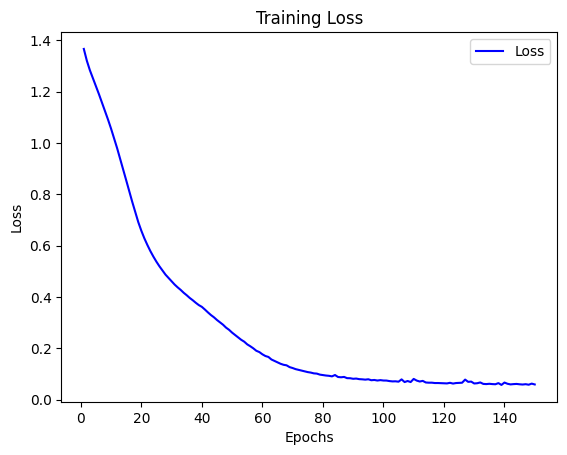

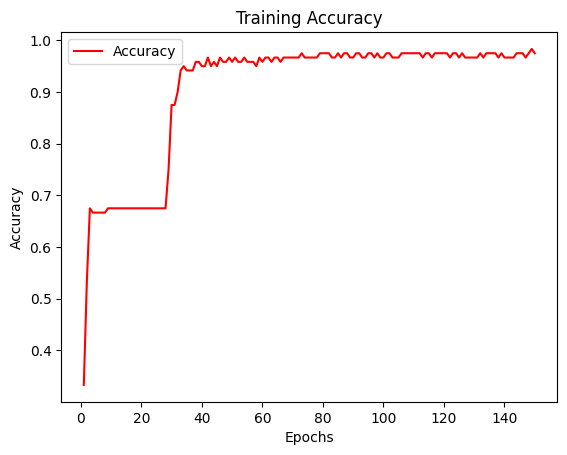

In [29]:
import matplotlib.pyplot as plt

# Modelin eğitim sürecinden kayıp ve MAE değerlerini alın
loss = history.history['loss']
accuracy = history.history['accuracy']

# Eğitim sürecinin epoch sayısını alın
epochs = range(1, len(loss) + 1)

# Kayıp değerlerini çizdirin
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MAE değerlerini çizdirin
plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


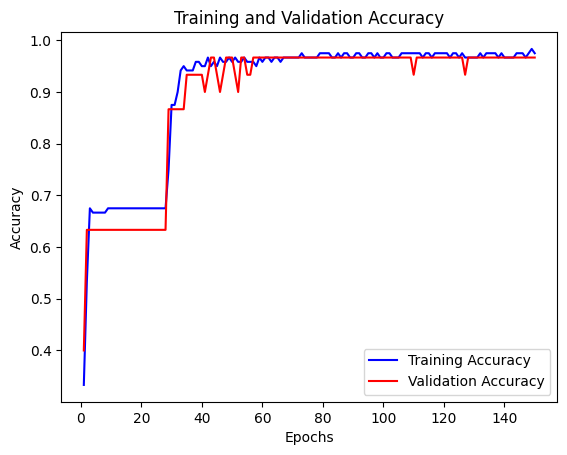

In [30]:
# Eğitim doğruluğu ve doğrulama doğruluğu değerlerini alın
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Eğitim sürecinin epoch sayısını alın
epochs = range(1, len(accuracy) + 1)

# Eğitim doğruluğu ve doğrulama doğruluğu değerlerini çizdirin
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
# evaluate the model
insurance_model_2.evaluate(MyX_test,MyY_test)

1/1 [==============================] - 0s 39ms/step - loss: 0.0644 - accuracy: 0.9667


[0.06435777246952057, 0.9666666388511658]

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate sensitivity (recall)
    sensitivity = recall_score(y_true, y_pred, average='weighted')

    # Calculate specificity
    unique_labels = set(y_true)
    specificity = {}
    for label in unique_labels:
        true_negatives = sum((y_true != label) & (y_pred != label))
        false_positives = sum((y_true != label) & (y_pred == label))
        specificity[label] = true_negatives / (true_negatives + false_positives)

    return f1, precision, sensitivity, specificity

In [33]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    total_predictions = len(y_true)

    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

In [34]:
y_pred = insurance_model_2.predict(MyX_test)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 83ms/step


In [35]:
f1, precision, sensitivity, specificity = calculate_metrics(MyY_test, y_pred_classes)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyLG=calculate_accuracy(MyY_test, y_pred_classes)
print("Accuracy",accuracyLG)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_pred_classes)
r2 = r2_score(MyY_test, y_pred_classes)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_pred_classes)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.9664109121909632
Precision: 0.9694444444444444
Sensitivity (Recall): 0.9666666666666667
Specificity: {0: 1.0, 1: 1.0, 2: 0.9473684210526315}
Accuracy 0.9666666666666667
Mean Squared Error (MSE): 0.03333333333333333
Coefficient of Determination (R^2): 0.9523052464228935
Ortalama Mutlak Hata (MAE): 0.03333333333333333
Kök Ortalama Kare Hata (RMSE): 0.18257418583505536


In [36]:
from tabulate import tabulate

# Calculate metrics
f1, precision, sensitivity, specificity = calculate_metrics(MyY_test, y_pred_classes)
accuracy = calculate_accuracy(MyY_test, y_pred_classes)
mse = mean_squared_error(MyY_test, y_pred_classes)
r2 = r2_score(MyY_test, y_pred_classes)
mae = mean_absolute_error(MyY_test, y_pred_classes)
rmse = np.sqrt(mse)

# Prepare the results as a list of lists
results = [
    ["F1 Score", f1],
    ["Precision", precision],
    ["Sensitivity (Recall)", sensitivity],
    ["Specificity", specificity],
    ["Accuracy", accuracy],
    ["Mean Squared Error (MSE)", mse],
    ["Coefficient of Determination (R^2)", r2],
    ["Mean Absolute Error (MAE)", mae],
    ["Root Mean Squared Error (RMSE)", rmse]
]

# Print the results as a table
table = tabulate(results, headers=["Metric", "Value"], tablefmt="pipe")
print(table)


| Metric                             | Value                                   |
|:-----------------------------------|:----------------------------------------|
| F1 Score                           | 0.9664109121909632                      |
| Precision                          | 0.9694444444444444                      |
| Sensitivity (Recall)               | 0.9666666666666667                      |
| Specificity                        | {0: 1.0, 1: 1.0, 2: 0.9473684210526315} |
| Accuracy                           | 0.9666666666666667                      |
| Mean Squared Error (MSE)           | 0.03333333333333333                     |
| Coefficient of Determination (R^2) | 0.9523052464228935                      |
| Mean Absolute Error (MAE)          | 0.03333333333333333                     |
| Root Mean Squared Error (RMSE)     | 0.18257418583505536                     |


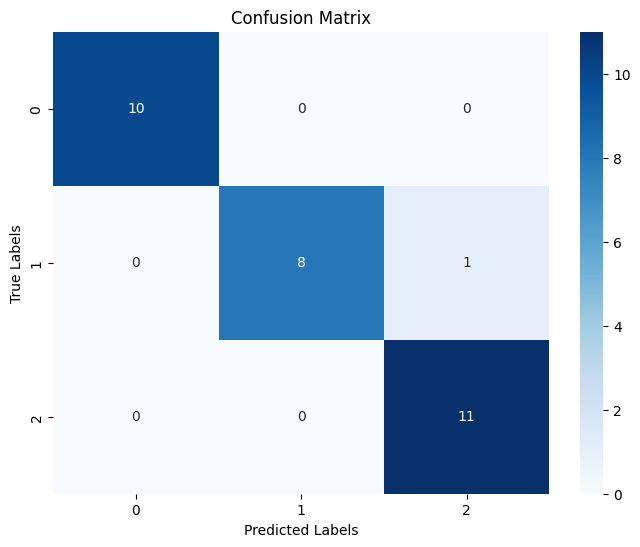

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(MyY_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


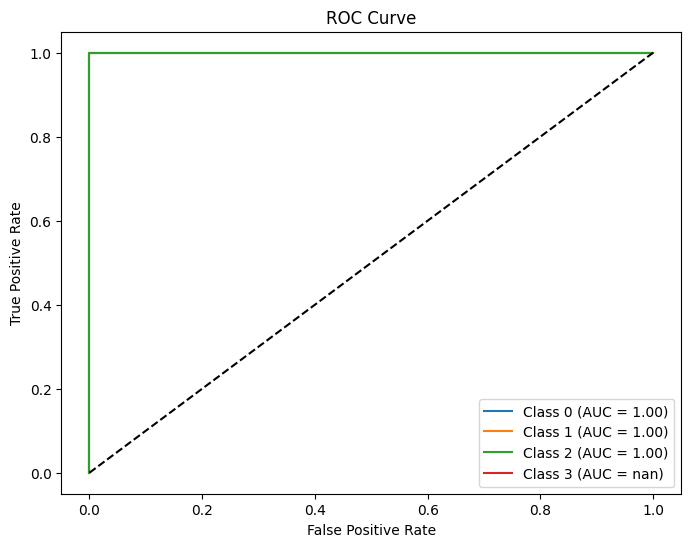

In [38]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and area under the curve (AUC) for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(MyY_test, y_pred[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Ölçeklendiriciyi oluşturun
scaler = MinMaxScaler()

# Verileri Min-Max ölçeklendirme ile ölçeklendirin
data = [[5,5,5,5]]
scaled_data = scaler.fit_transform(data)

# Ölçeklendirilmiş verileri modele vererek tahmin yapın
prediction = insurance_model_2.predict(scaled_data)

# Tahmin sonuçlarını sınıflar olarak elde edin
predicted_class = np.argmax(prediction, axis=1)
print(predicted_class)

1/1 [==============================] - 0s 22ms/step
[0]
